## Capital Asset Pricing Model (CAPM)
### Strength Training with Functions, Numpy


### University of Virginia
### Programming for Data Science
### Last Updated: June 29, 2021
---

### Objectives: 
- Use numpy and functions to compute a stock's CAPM beta
- Perform sensitivity analysis to understand how the data points impact the beta estimate

### Background


In finance, CAPM is a single-factor regression model used for explaining and predicting excess stock returns. There are better, more accurate models, but it has its uses. For example, the *market beta* is a useful output.


Here is the formula for calculating the expected excess return:

\begin{aligned} &E[R_i] - R_f  = \beta_i ( E[R_m] - R_f ) \\ \\ &\textbf{where:} \\ &ER_i = \text{expected return of stock i} \\ &R_f = \text{risk-free rate} \\ &\beta_i = \text{beta of the stock} \\ &ER_m - R_f = \text{market risk premium} \\ \end{aligned} 

#### Review the instructions below to complete the requested tasks.

#### TOTAL POINTS: 10
---  


In [13]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# risk-free Treasury rate
R_f = 0.0175 / 252

In [2]:
# read in the market data
data = pd.read_csv('capm_market_data.csv')

Look at some records  
SPY is an ETF for the S&P 500 (the "stock market")  
AAPL is Apple  
The values are closing prices, adjusted for splits and dividends

In [3]:
data

,date,spy_adj_close,aapl_adj_close
0,2020-01-02,321.555786,298.829956
1,2020-01-03,319.120911,295.924713
2,2020-01-06,320.338379,298.282715
3,2020-01-07,319.437653,296.879883
4,2020-01-08,321.140106,301.655548
...,...,...,...
130,2020-07-09,314.380005,383.010010
131,2020-07-10,317.589996,383.679993
132,2020-07-13,314.839996,381.910004
133,2020-07-14,318.920013,388.230011


Drop the date column

In [6]:
drop_date = data.drop(['date'], axis=1)
print(drop_date)


     spy_adj_close  aapl_adj_close
0       321.555786      298.829956
1       319.120911      295.924713
2       320.338379      298.282715
3       319.437653      296.879883
4       321.140106      301.655548
..             ...             ...
130     314.380005      383.010010
131     317.589996      383.679993
132     314.839996      381.910004
133     318.920013      388.230011
134     321.850006      390.899994

[135 rows x 2 columns]


Compute daily returns (percentage changes in price) for SPY, AAPL  
Be sure to drop the first row of NaN  
Hint: pandas has functions to easily do this

In [7]:
daily_returns = drop_date.pct_change()
daily_returns = daily_returns.drop([0], axis = 0)
print(daily_returns)


     spy_adj_close  aapl_adj_close
1        -0.007572       -0.009722
2         0.003815        0.007968
3        -0.002812       -0.004703
4         0.005330        0.016086
5         0.006781        0.021241
..             ...             ...
130      -0.005693        0.004300
131       0.010211        0.001749
132      -0.008659       -0.004613
133       0.012959        0.016548
134       0.009187        0.006877

[134 rows x 2 columns]


#### 1. (1 PT) Print the first 5 rows of returns

In [8]:
daily_returns.head(5)

,spy_adj_close,aapl_adj_close
1,-0.007572,-0.009722
2,0.003815,0.007968
3,-0.002812,-0.004703
4,0.005330,0.016086
5,0.006781,0.021241


Save AAPL, SPY returns into separate numpy arrays  
#### 2. (1 PT) Print the first five values from the SPY numpy array, and the AAPL numpy array

In [11]:
aapl = np.array(daily_returns['aapl_adj_close'])
print(aapl[:5])
spy = np.array(daily_returns['spy_adj_close'])
print(spy[:5])

[-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]
[-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]


##### Compute the excess returns of AAPL, SPY by simply subtracting the constant *R_f* from the returns.
##### Specifically, for the numpy array containing AAPL returns, subtract *R_f* from each of the returns. Repeat for SPY returns.

NOTE:  
AAPL - *R_f* = excess return of Apple stock  
SPY - *R_f* = excess return of stock market


In [16]:
aapl_excess = np.array([y-R_f for y in aapl])
spy_excess = np.array([y-R_f for y in spy])

#### 3. (1 PT) Print the LAST five excess returns from both AAPL, SPY numpy arrays


In [17]:
print(aapl[-5:])
print(spy[-5:])

[ 0.00430032  0.00174926 -0.00461319  0.01654842  0.00687732]
[-0.00569292  0.01021055 -0.00865896  0.01295902  0.00918723]


#### 4. (1 PT) Make a scatterplot with SPY excess returns on x-axis, AAPL excess returns on y-axis####
Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

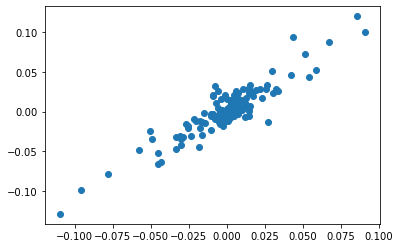

In [18]:
plt.scatter(spy_excess,aapl_excess)

#### 5. (3 PTS) Use Linear Algebra (matrices) to Compute the Regression Coefficient Estimate, \\(\hat\beta_i\\)

Hint 1: Here is the matrix formula where *x′* denotes transpose of *x*.

\begin{aligned} \hat\beta_i=(x′x)^{−1}x′y \end{aligned} 

Hint 2: consider numpy functions for matrix multiplication, transpose, and inverse. Be sure to review what these operations do, and how they work, if you're a bit rusty.

In [20]:
from numpy.linalg import inv
x = spy_excess.reshape(-1,1)
y = aapl_excess. reshape(-1,1)
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), x.transpose()), y)
print(beta)

[[1.08833171]]


You should have found that the beta estimate is greater than one.  
This means that the risk of AAPL stock, given the data, and according to this particular (flawed) model,  
is higher relative to the risk of the S&P 500.


#### Measuring Beta Sensitivity to Dropping Observations (Jackknifing)

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

#### 6. (3 PTS) Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays x and y as inputs
- output a list of tuples. each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [22]:
def beta_sensitivity(x, y):
    out = []
    nobs = x.shape[0]
    for ix in range(nobs):
        xx = np.delete(x, ix).reshape(-1,1)
        yy = np.delete(y, ix).reshape(-1,1)
    
        bi = np.matmul(np.matmul(np.linalg.inv(np.matmul(xx.transpose(), xx)), xx.transpose()), yy)
        out.append((ix, bi[0][0]))
        
    return out

#### Call `beta_sensitivity()` and print the first five tuples of output.

In [23]:
beta_sens = beta_sensitivity(spy_excess, aapl_excess)
print(beta_sens[0:6])

[(0, 1.0882175232839155), (1, 1.0881867249750736), (2, 1.0882839540700084), (3, 1.087783412511201), (4, 1.087388967419927), (5, 1.0884928178727575)]
